In [1]:
##-------------------------------------1. DATA LOADING --------------------------------##

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc # for memory optimization  ------- helps in free memory if needed

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [6]:
# -----------------------------
#  Load Datasets
# -----------------------------

# Path to raw data folder
raw_data_path = "/content/diabetic_data.csv"
mapping_path = "/content/IDS_mapping.csv"

# Load main dataset
df = pd.read_csv(raw_data_path)

# Load mapping/lookup file
mapping = pd.read_csv(mapping_path)


In [7]:
# -----------------------------
# 3️ Check Basic Shapes
# -----------------------------

print("Main dataset shape:", df.shape)
print("Mapping dataset shape:", mapping.shape)
# shows numebr of rows and coloumns

Main dataset shape: (27793, 50)
Mapping dataset shape: (67, 2)


In [8]:
# -----------------------------
#  Check Column Names and Data Types
# -----------------------------

# Column names
print("Columns in main dataset:\n", df.columns)

# Data types
print("\nData types:\n", df.dtypes)


Columns in main dataset:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Data types:
 encounter_id                 

In [9]:
# -----------------------------
# Convert dtypes (memory optimization)
# -----------------------------

# Example: convert object/categorical columns to category dtype
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

# Convert integer columns to smaller int type if possible
for col in df.select_dtypes(include='int64'):
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Convert float columns to smaller float type
for col in df.select_dtypes(include='float64'):
    df[col] = pd.to_numeric(df[col], downcast='float')

# Check memory usage before and after
print("\nMemory usage after optimization:")
print(df.info(memory_usage='deep'))



Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27793 entries, 0 to 27792
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              27793 non-null  int32   
 1   patient_nbr               27793 non-null  int32   
 2   race                      27793 non-null  category
 3   gender                    27793 non-null  category
 4   age                       27793 non-null  category
 5   weight                    27793 non-null  category
 6   admission_type_id         27793 non-null  int8    
 7   discharge_disposition_id  27793 non-null  int8    
 8   admission_source_id       27793 non-null  int8    
 9   time_in_hospital          27793 non-null  int8    
 10  payer_code                27793 non-null  category
 11  medical_specialty         27793 non-null  category
 12  num_lab_procedures        27793 non-null  int16   
 13  num_procedur

In [10]:
# -----------------------------
#  Set Index Column (Optional)
# -----------------------------

# Often we set 'patient_nbr' as index for easier referencing
df.set_index('patient_nbr', inplace=True, drop=False)


In [12]:
# -----------------------------
#  Save raw backup copies
# -----------------------------

# Backup original dataset in processed folder to avoid accidental loss
#df.to_csv("../data/processed/01_raw_backup.csv", index=False)


In [13]:
## ------------------------------------------RAW EDA (OPTIONAL -------------------------------------##)

In [14]:
# -----------------------------
# Quick Look: Head and Tail
# -----------------------------

# Display first 5 rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8222157,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1.0,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
55629189,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9.0,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
86047875,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6.0,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
82442376,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7.0,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
42519267,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5.0,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df.tail()  # gives last rows 5

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54889515,91073484,54889515,Caucasian,Male,[60-70),?,2,1,1,11,?,Family/GeneralPractice,68,2,23,2,0,5,428,425,496,9.0,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
900603,91074294,900603,Caucasian,Female,[40-50),?,1,1,7,7,HM,InternalMedicine,74,3,27,0,0,0,574,250.02,276,9.0,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
109470600,91077828,109470600,Caucasian,Female,[30-40),?,6,2,7,10,?,Nephrology,78,3,30,1,0,3,410,428,486,6.0,NaN,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
89626239,91077942,89626239,Caucasian,Female,[80-90),?,2,3,1,12,MC,Pulmonology,79,0,13,1,3,6,807,E888,458,9.0,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
81684747,91079766,81684747,Caucasian,Female,[60-70),?,1,1,7,1,BC,?,40,0,10,1,0,0,560,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# -----------------------------
#  Dataset Info and Summary
# -----------------------------

# Info: data types, non-null counts --- df.info() shows which coloumns has empty values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27793 entries, 8222157 to 81684747
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              27793 non-null  int32   
 1   patient_nbr               27793 non-null  int32   
 2   race                      27793 non-null  category
 3   gender                    27793 non-null  category
 4   age                       27793 non-null  category
 5   weight                    27793 non-null  category
 6   admission_type_id         27793 non-null  int8    
 7   discharge_disposition_id  27793 non-null  int8    
 8   admission_source_id       27793 non-null  int8    
 9   time_in_hospital          27793 non-null  int8    
 10  payer_code                27793 non-null  category
 11  medical_specialty         27793 non-null  category
 12  num_lab_procedures        27793 non-null  int16   
 13  num_procedures            27793 non-null  

In [18]:
df.describe()  #Explanation: Provides mean, std, min, max, quartiles. Useful for spotting outliers.

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,2.779300e+04,2.779300e+04,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27793.000000,27792.000000
mean,5.250293e+07,2.566143e+07,2.320836,5.337603,6.820350,4.709711,45.159357,1.426007,15.311265,0.158205,0.069946,0.603317,6.826641
std,2.417376e+07,3.197322e+07,1.732156,6.956722,5.057342,3.142485,18.426337,1.745317,8.106885,0.718048,0.454936,1.212693,2.037473
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.365125e+07,3.016755e+06,1.000000,1.000000,2.000000,2.000000,33.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,5.467619e+07,1.277532e+07,2.000000,1.000000,7.000000,4.000000,46.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,7.310811e+07,2.580014e+07,3.000000,6.000000,7.000000,6.000000,58.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,9.107977e+07,1.152184e+08,8.000000,25.000000,20.000000,14.000000,129.000000,6.000000,63.000000,20.000000,25.000000,17.000000,9.000000


In [20]:
# -----------------------------
# 3️⃣ Missing Values
# -----------------------------

# Count missing values per column
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]

# exp - list coloumns with missing values


,0
diag_3,1
number_diagnoses,1
max_glu_serum,24633
A1Cresult,22821
metformin,1
repaglinide,1
nateglinide,1
chlorpropamide,1
glimepiride,1
acetohexamide,1


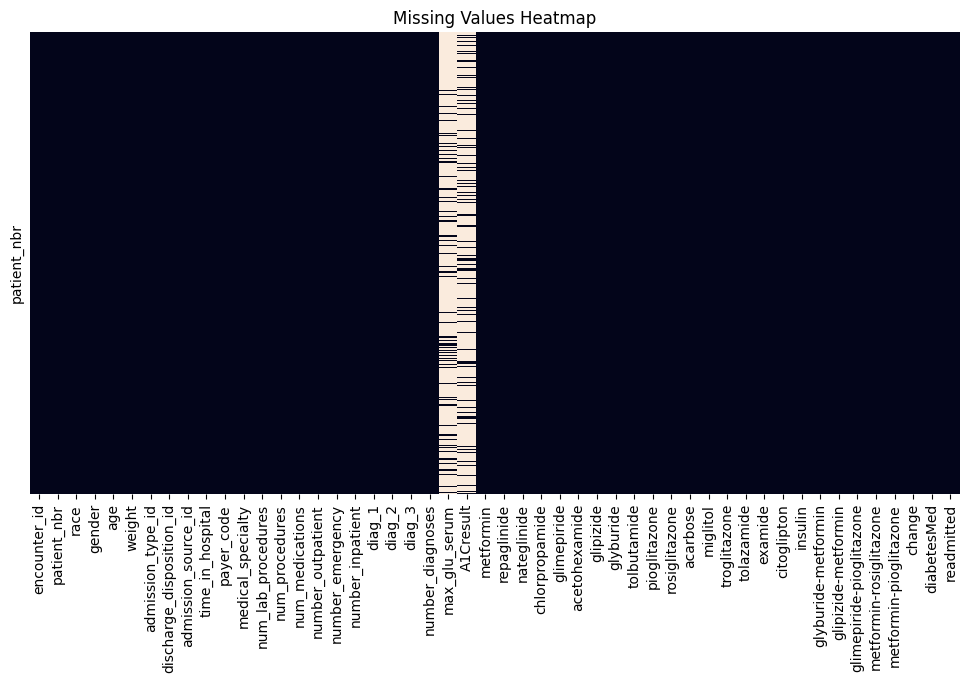

In [21]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()
#visuals of missing values - heatmap

In [22]:
# -----------------------------
#  Duplicates
# -----------------------------

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [23]:
# -----------------------------
#  Unique Value Count
# -----------------------------

unique_counts = df.nunique().sort_values()
unique_counts


,0
metformin-pioglitazone,1
glipizide-metformin,1
citoglipton,1
glimepiride-pioglitazone,1
metformin-rosiglitazone,1
examide,1
gender,2
acetohexamide,2
tolbutamide,2
miglitol,2


/tmp/ipython-input-3929533332.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


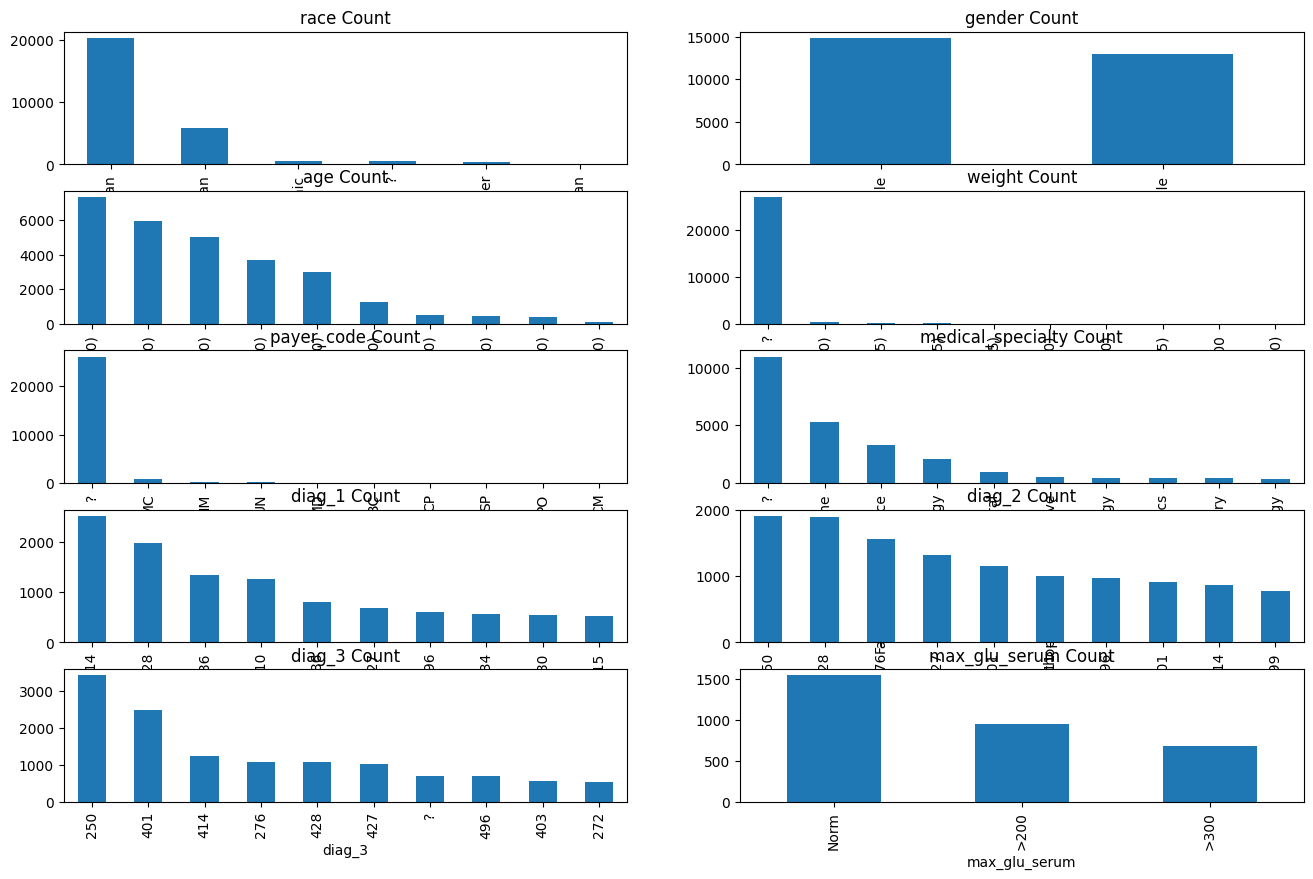

In [25]:
# -----------------------------
# Categorical Feature Count Plots
# -----------------------------

cat_cols = df.select_dtypes(include='category').columns[:10]  # first 10 categories

plt.figure(figsize=(16,10))
for i, col in enumerate(cat_cols):
    plt.subplot(5,2,i+1)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"{col} Count")
plt.tight_layout()
plt.show()


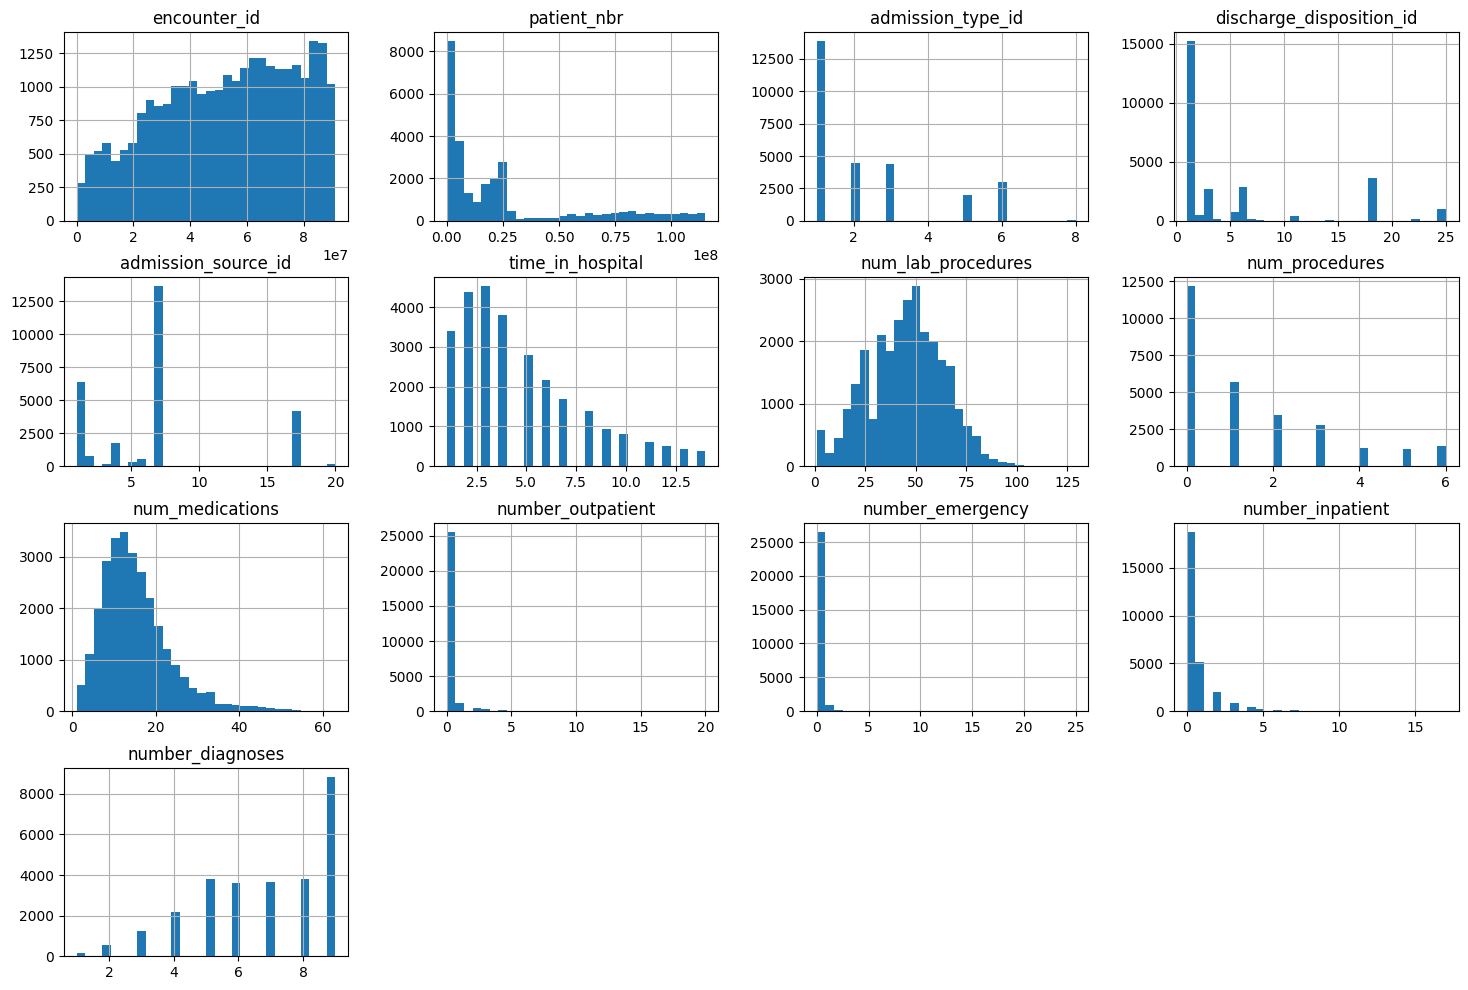

In [27]:
# -----------------------------
# 7️⃣ Numeric Feature Histograms / KDE
# -----------------------------

numeric_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32']).columns

df[numeric_cols].hist(figsize=(18,12), bins=30)
plt.show()


# visualize distributions , skewness and outliers

/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`

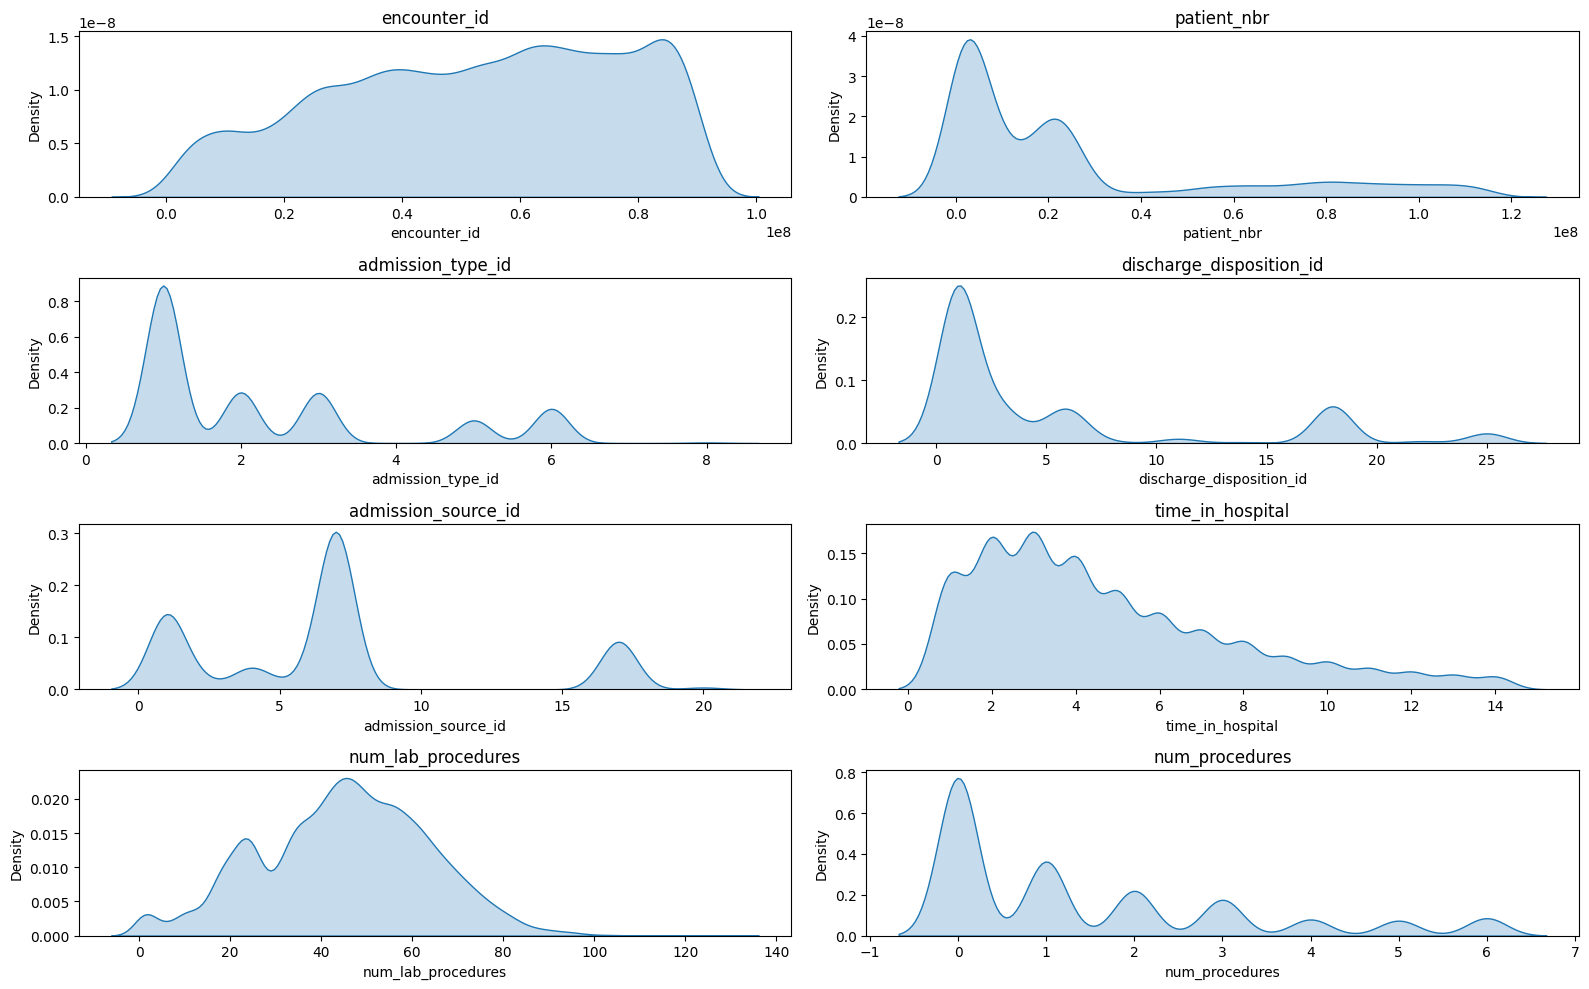

In [28]:
# KDE plots for numeric features (optional)
plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols[:8]):  # plot first 8 numeric columns
    plt.subplot(4,2,i+1)
    sns.kdeplot(df[col], shade=True)
    plt.title(col)
plt.tight_layout()
plt.show()


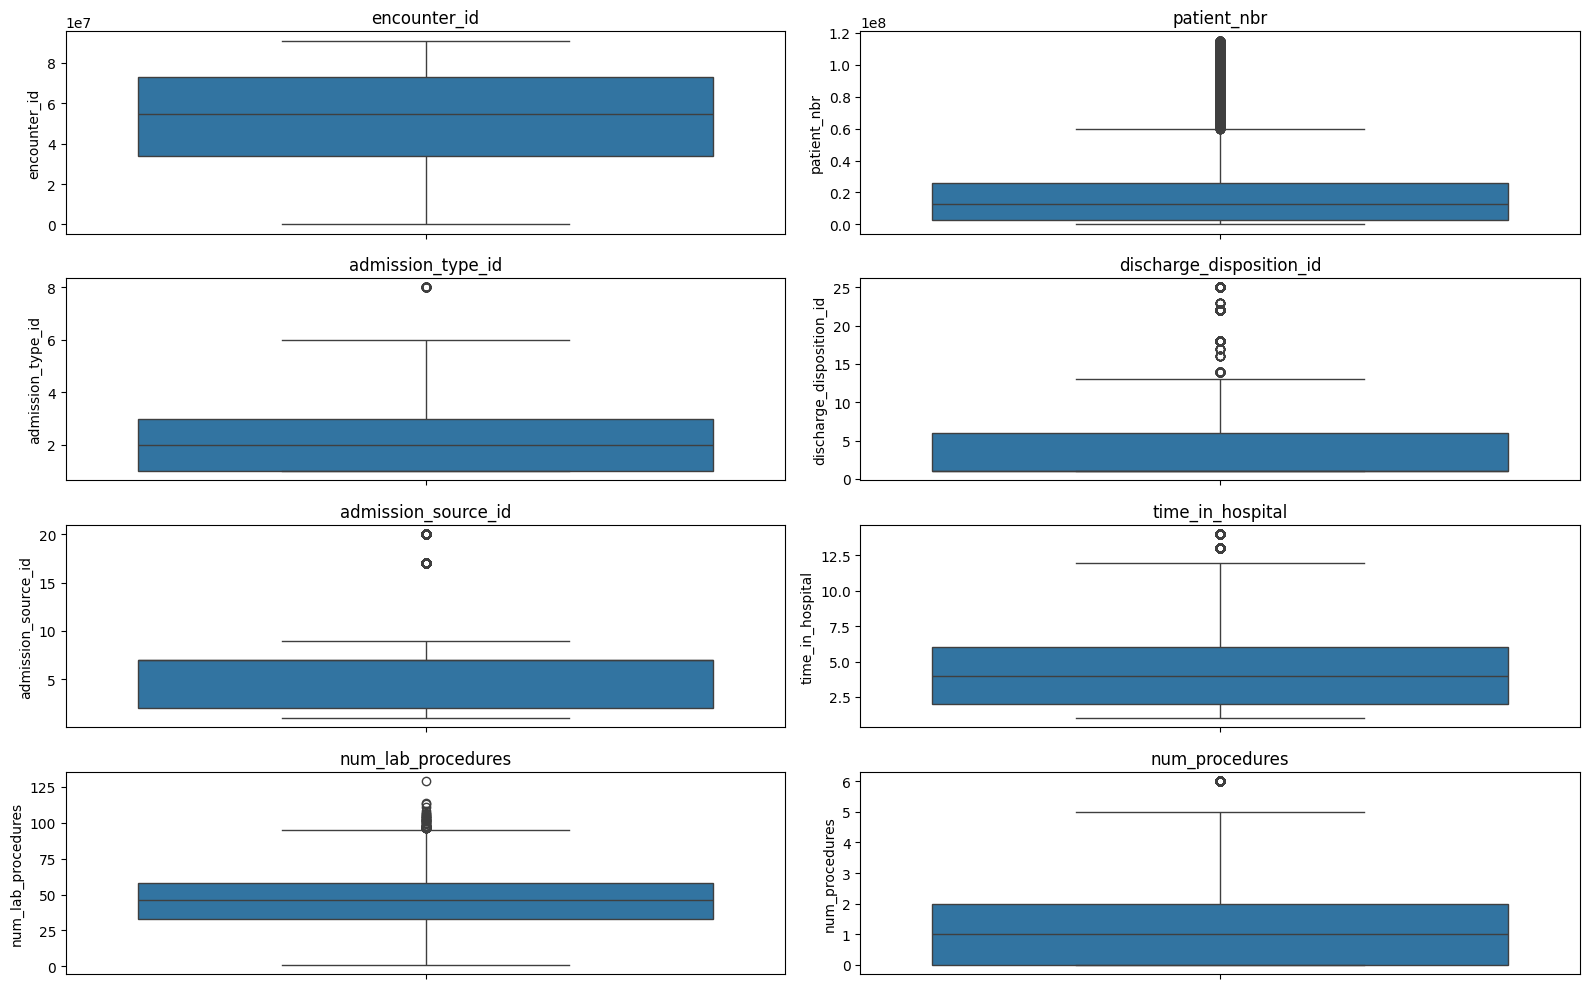

In [29]:
# -----------------------------
# 8️⃣ Boxplots (numeric)
# -----------------------------

plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols[:8]):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#box plot highlights outliers visually

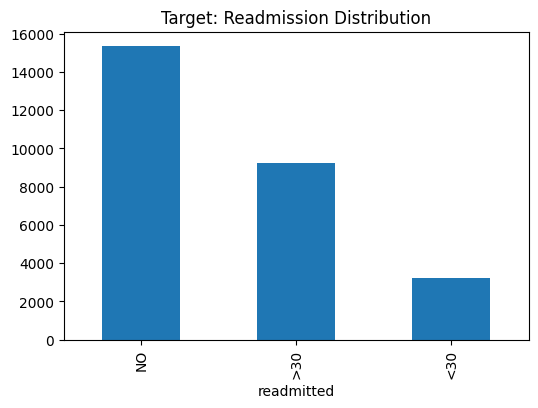

In [30]:
# -----------------------------
# 9️⃣ Target Variable Distribution
# -----------------------------

plt.figure(figsize=(6,4))
df['readmitted'].value_counts().plot(kind='bar')
plt.title("Target: Readmission Distribution")
plt.show()

#critical for classification imbalance

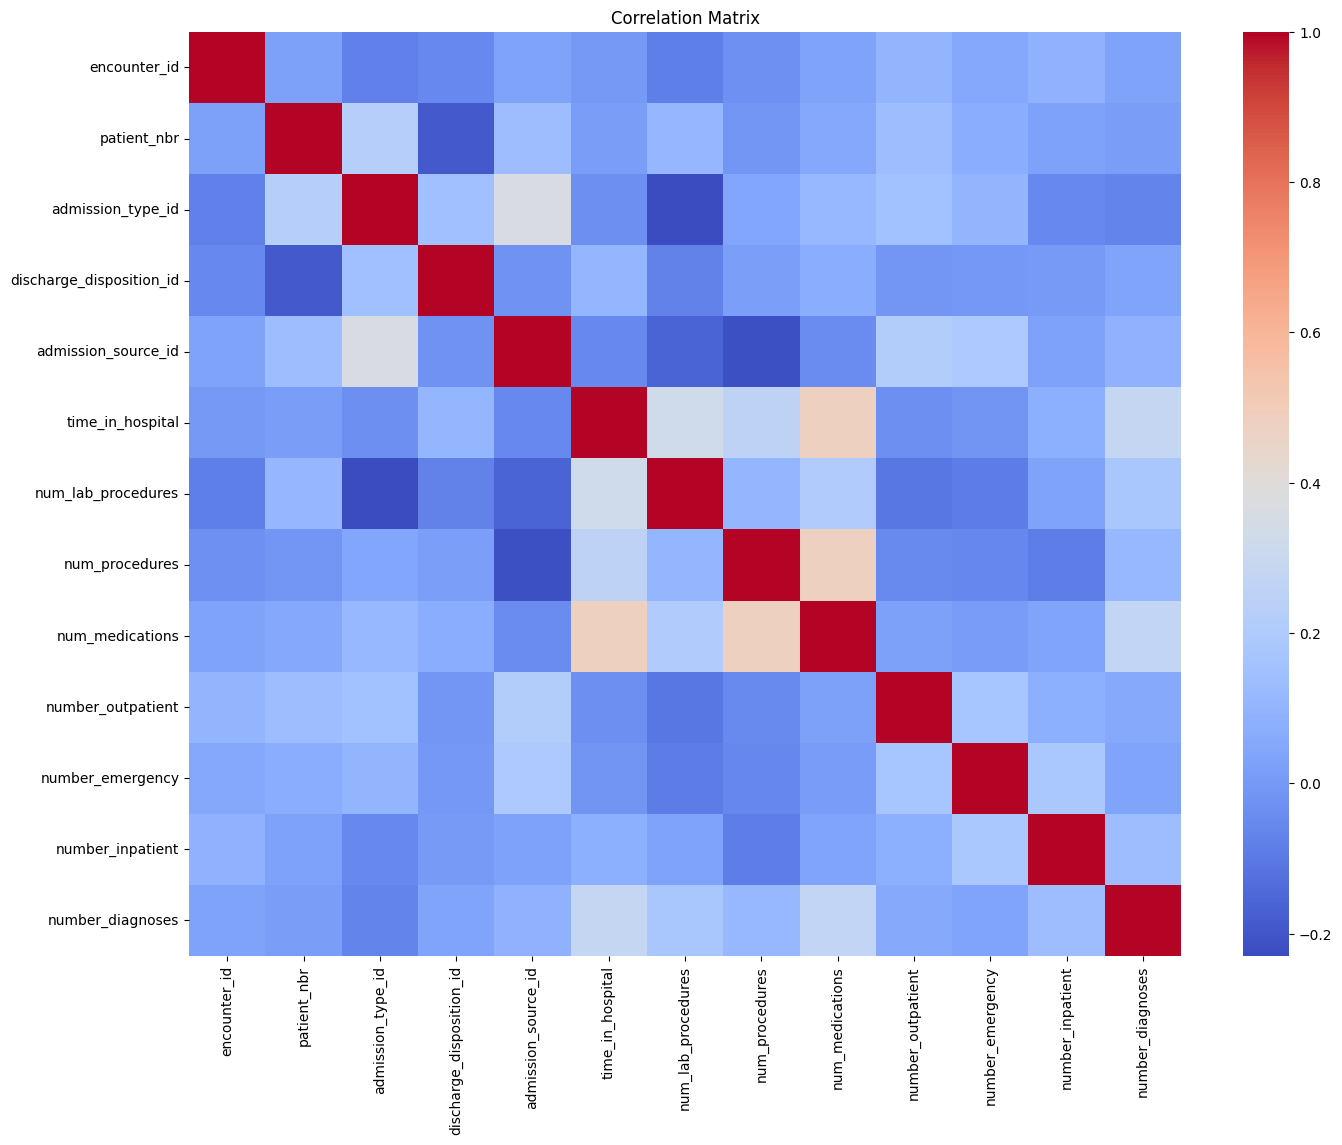

In [32]:
# -----------------------------
# 10″ Correlation Matrix
# -----------------------------

numeric_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32']).columns

plt.figure(figsize=(16,12))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#Detects multicollinearity, useful before feature selection.

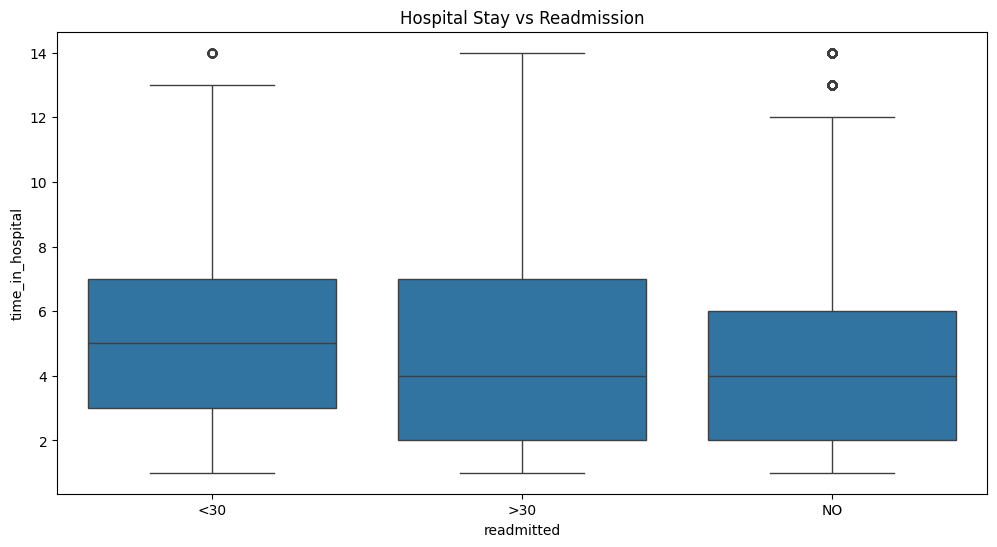

In [34]:
# -----------------------------
# 11️⃣ Feature vs Target Plots (example)
# -----------------------------

plt.figure(figsize=(12,6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df.reset_index(drop=True))
plt.title("Hospital Stay vs Readmission")
plt.show()

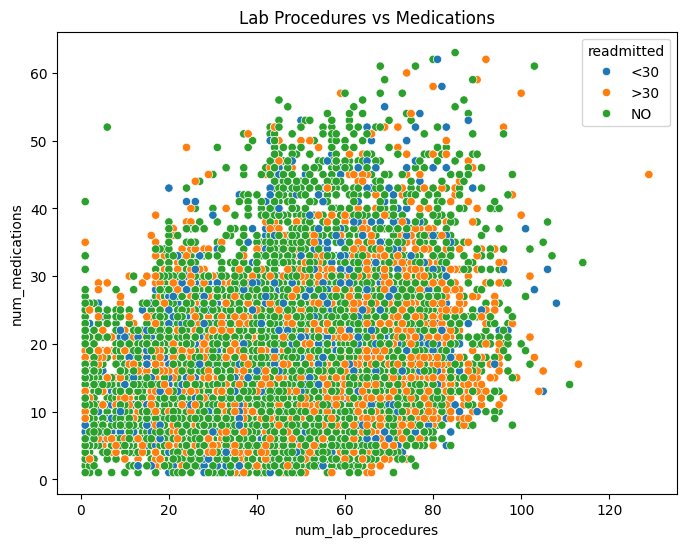

In [35]:
# -----------------------------
# 12️⃣ Scatter Plot Example
# -----------------------------

plt.figure(figsize=(8,6))
sns.scatterplot(x='num_lab_procedures', y='num_medications', hue='readmitted', data=df)
plt.title("Lab Procedures vs Medications")
plt.show()


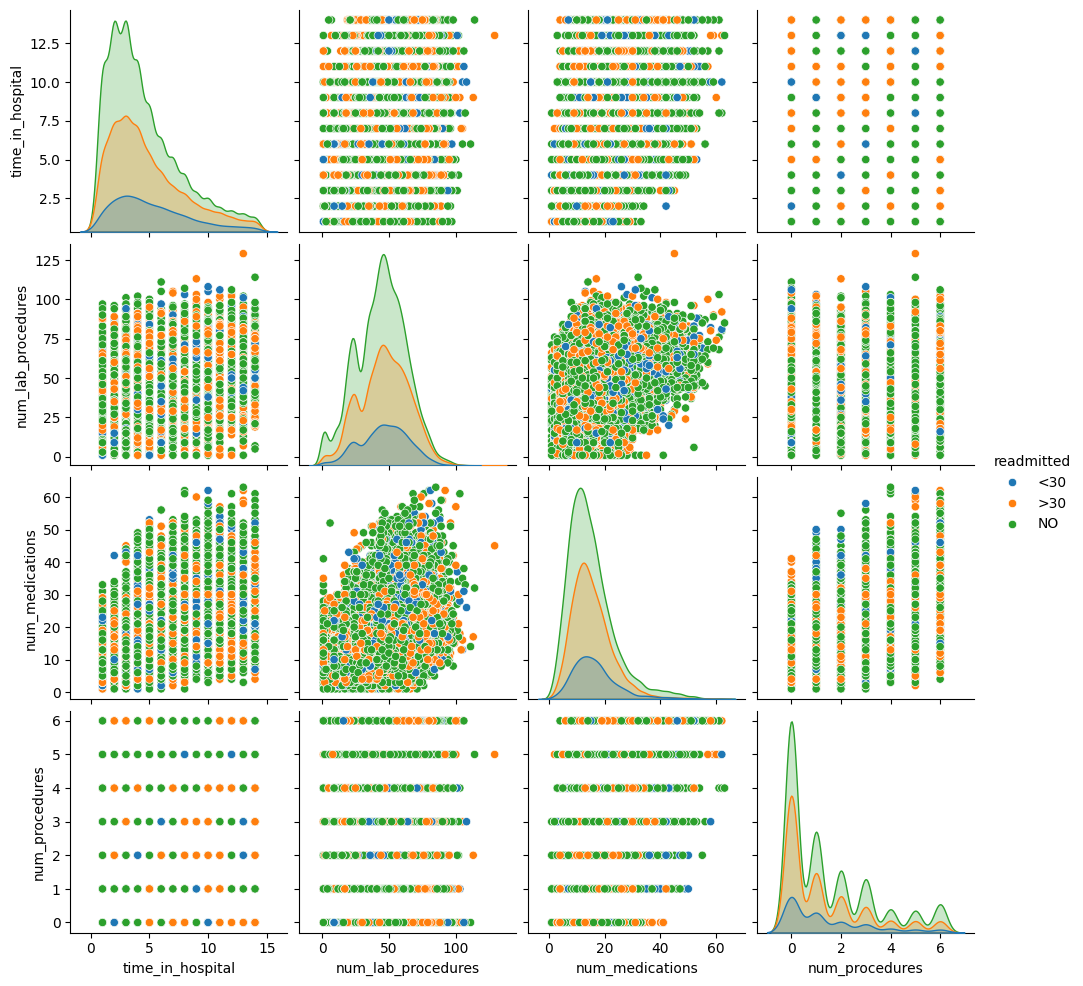

In [36]:
# -----------------------------
# 13️⃣ Pairplot (Optional, for few numeric features)
# -----------------------------
#Check pairwise relationships between key numeric features and target.
sample_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'num_procedures', 'readmitted']

sns.pairplot(df[sample_cols], hue='readmitted', diag_kind='kde', height=2.5)
plt.show()


In [37]:
# -----------------------------
# 14️⃣ Detect Constant / Near-zero Variance Features
# -----------------------------

constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Constant columns:", constant_cols)

# Near-zero variance (if numeric)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(df[numeric_cols])
low_var_cols = [col for col, var in zip(numeric_cols, selector.variances_) if var < 0.01]
print("Near-zero variance columns:", low_var_cols)


Constant columns: ['examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
Near-zero variance columns: []


In [38]:
# -----------------------------
# 15️⃣ Skewness / Kurtosis Check
# -----------------------------

skewness = df[numeric_cols].skew().sort_values(ascending=False)
kurtosis = df[numeric_cols].kurt().sort_values(ascending=False)

print("Top skewed features:\n", skewness.head())
print("\nTop kurtotic features:\n", kurtosis.head())


Top skewed features:
 number_emergency            20.160961
number_outpatient            8.051949
number_inpatient             3.551394
discharge_disposition_id     1.552329
patient_nbr                  1.415665
dtype: float64

Top kurtotic features:
 number_emergency            795.622771
number_outpatient           102.741220
number_inpatient             19.785251
num_medications               3.069288
discharge_disposition_id      0.992322
dtype: float64


In [39]:
# -----------------------------
# 16️⃣ Groupby Target Stats
# -----------------------------

# Example: mean of numeric features by readmission
df.groupby('readmitted')[numeric_cols].mean().T


/tmp/ipython-input-2681921761.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('readmitted')[numeric_cols].mean().T


readmitted,<30,>30,NO
encounter_id,5.328325e+07,4.903518e+07,5.442803e+07
patient_nbr,2.827007e+07,3.094043e+07,2.193038e+07
admission_type_id,2.269351e+00,2.490917e+00,2.229140e+00
discharge_disposition_id,5.842072e+00,4.907764e+00,5.491656e+00
admission_source_id,6.879838e+00,7.529952e+00,6.380117e+00
time_in_hospital,5.222846e+00,4.843966e+00,4.521838e+00
num_lab_procedures,4.638733e+01,4.653006e+01,4.407686e+01
num_procedures,1.362047e+00,1.305147e+00,1.512321e+00
num_medications,1.645100e+01,1.534051e+01,1.505593e+01
number_outpatient,1.972534e-01,2.329152e-01,1.049544e-01


In [40]:
# -----------------------------
# 17️⃣ Rare Categories Detection
# -----------------------------

for col in cat_cols:
    rare = df[col].value_counts(normalize=True)
    rare = rare[rare < 0.01]  # categories <1%
    if len(rare) > 0:
        print(f"{col} has rare categories:\n", rare.index.tolist(), "\n")


race has rare categories:
 ['Asian'] 

age has rare categories:
 ['[0-10)'] 

weight has rare categories:
 ['[50-75)', '[100-125)', '[0-25)', '[125-150)', '[25-50)', '[150-175)', '>200', '[175-200)'] 

payer_code has rare categories:
 ['UN', 'MD', 'BC', 'CP', 'SP', 'PO', 'CM', 'DM', 'SI', 'CH', 'WC', 'OT'] 

medical_specialty has rare categories:
 ['Surgery-Neuro', 'Hematology/Oncology', 'Pediatrics', 'Pediatrics-Endocrinology', 'Gastroenterology', 'Pediatrics-CriticalCare', 'Endocrinology', 'Otolaryngology', 'Radiology', 'Obsterics&Gynecology-GynecologicOnco', 'Pediatrics-Pulmonology', 'Psychology', 'Neurology', 'Anesthesiology-Pediatric', 'Oncology', 'Surgery-Thoracic', 'Surgery-Plastic', 'Gynecology', 'Surgery-Vascular', 'Surgery-Colon&Rectal', 'InfectiousDiseases', 'Pediatrics-Neurology', 'Osteopath', 'Surgery-Pediatric', 'Psychiatry-Child/Adolescent', 'AllergyandImmunology', 'Podiatry', 'Rheumatology', 'Surgeon', 'Pediatrics-Hematology-Oncology', 'Pediatrics-AllergyandImmunology',